In [1]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
except:
	pass


/home/edwin/Documents/Programming_Projects/intelicompu


 # _Regresión simple_ (con Máquinas de Soporte Vectorial).

 ## 1. Introducción
 La _regresión lineal_ es un concepto familiar de la estadística paramétrica donde se aplican muchos de los principios y teoremas
 fundamentales de esta área. Existen diversos propósitos para realizar una regresión, pero en particular se pueden reducir a dos
 principales:

 1. _Ajustar_ la mejor linea recta a un conjunto de datos, y con esto se cumplen dos subobjetivos:

 a. Encontrar los _parámetros_ de la mejor linea recta. Estos pueden ser lo que se busca originalmente en algún tipo de experimento diseñado.

 b. Realizar predicciones en base a los datos y la mejor linea recta. Esta linea recta se puede generalizar y dado un cierto _intervalo de
 confianza esto puede significar que las predicciones son válidas.

 2. Encontrar una _correlación_ entre las variables que se encuentran en el conjunto de datos. En diversos caso de problemas reales sucede
 que se tienen mediciones y _no_ se conoce cuáles de estos datos tienen una _correlación lineal_ por lo que realizar la regresión puede
 ayudar a separar estas variables entre sí.


 ### Modelo matemático
 Sea $\mathbf{X} \in \mathbb{R}$ el conjunto de datos de la variable _independiente_, y sea $\mathbf{Y} \in \mathbb{R}$ el conjunto de datos de la
 variable _dependiente_, entonces el _modelo lineal_ que se busca obtener es el siguiente: $$ \hat{Y} = \alpha + \beta X ,$$ donde $\hat{Y}$ representa
 el valor de la variable _dependiente_ **obtenida** por el modelo lineal. Nótese que **no** es la misma variable original, pues es posible que _no_
 sean los mismos valores.
 Una vez descrito el modelo, quedan por determinar los dos parámetros $\alpha$ y $\beta,$ ¿cómo se realiza esto?

 ### Minimización de la _función de costo_
 Normalmente se necesitan dos ecuaciones diferentes para dos incógnitas, y esto es lo que se planea realizar. Al menos es una de las formas de realizar
 esta determinación. Pero este modelo de _regresión lineal ordinaria_ se basa en que los **errores** deben de ser minimizados. ¿Qué tipo de errrores?
 Es esta pregunta la que introduce la siguiente _función de costo_ que debe de ser minimizada:
 $$ RSS = \sum_{i=1}^{N} \hat{\varepsilon_i}^2 =  \sum_{i=1}^{N} \left(y_i - \left(\alpha + \beta x_i \right)\right)^2 ,$$
 donde $N$ es el número total de valores tanto en $\mathbf{X}$ como en $\mathbf{Y}$ y $\hat{\varepsilon_i}$ son los errores de _predicción_ respecto a los
 _reales_, esto es, entre $\mathbf{Y}$ y $\mathbf{\hat{Y}}$.
 Existe una forma cerrada (expresiones analíticas que se obtienen a partir
 de teoremas del cálculo diferencial), sin embargo esto puede ser minimizado también mediante métodos numéricos (como [descenso de gradiente](https://en.wikipedia.org/wiki/Gradient_descent)
 o el [método de Newton](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization), entre muchos otros). En particular, esta libreta _no_ tiene como
 objetivo realizar y demostrar este tipo de análisis. Para mayor información, visitar las referencias 1 y 2.

 ### Las diferentes hipótesis de la regresión lineal ordinaria
 Para que este modelo sea viable, confiable y aplicable, se deben cumplir varias hipótesis las cuales son difíciles de satisfacer en situaciones de datos reales
 pero que es común encontrar que se satisfacen en experimentos diseñados y/o controlados. Las hipótesis son:

 1. El **valor esperado** de los errores $\varepsilon$ debe cumplir que $E\left(\varepsilon \vert x\right) = 0.$
 2. La **varianza** de los errores debe de ser _finita_, _constante_ y _conocida_ tal que cumpla $V\left(\varepsilon \vert x\right) = \sigma^2 < \infty.$
 3. **No** existe una _correlación_ entre los errores tal que $Cov\left(\varepsilon_i \vert \varepsilon_j\right) = 0.$


 Lo más _común_ es asumir que los _errores_ siguen una distribución _normal_ tal que $\varepsilon \vert x \sim \mathcal{N}\left(0, \sigma^2\right)$
 y esta es la hipótesis más _fuerte_ y _restrictiva_ para este modelo; cuando esto no sucede se deben emplear métodos _no paramétricos_ que puedan resolver
 esta limitante, o bien, acudir a métodos más robustos que pertenecen a la rama de la inteligencia computacional como se verá posteriormente en esta libreta.

 ## 2. _Support Vector Regression_
 NOTA: **NO** se cubrirá toda la teoría de las máquinas de soporte vectorial (SVM); para más información, revisar la referencia 3.

 ### Motivación
 Las SVM han probado ser un algoritmo robusto, fantástico y muy adecuado para problemas de _clasificación_. Sin embargo, V. Vapnik creó un algoritmo adicional
 donde atacaba directamente el problema de la _regresión_ mediante un problema de _clasificación_, efectivamente aplicando las SVM a este problema y creando
 un algoritmo extremadamente robusto para crear regresiones lineales y no lineales sin las restricciones que contiene el modelo de regresión lineal ordinario.

 ### Modelo matemático
 NOTA: **No** se llevarán a cabo las demostraciones en esta libreta, y la presentación de las ecuaciones será meramente ilustrativa.
 Para aquella persona que desee conocer más al respecto, leer con detalle las referencias 4 y 5.

 La formulación estándar de las SVM para regresión se conoce como $\varepsilon-SVR$ (epsilon support vector regression, en inglés). Para realizar la formulación
 se debe tener un conjunto de datos ${(x_1, y_1),\cdots,(x_n,y_n)} \subset \mathbb{H}\times\mathbb{R}$, donde los valores $x_1 \cdots x_n$ son elementos
 de un espacio general $\mathbb{H}$ dado que en el caso más general pueden contener cualquier número de _características_, y no están restringidas
 a pertenecer el conjunto $\mathbb{R}$.
 Es muy importante notar que a diferencia del caso de clasificación, aquí las _clases_ (los valores $y$) son todos los números reales.
 Ahora bien, igual que en el caso de la regresión lineal ordinaria se busca encontrar una relación lineal tal que
 $$ f(x) = \langle \omega, x\rangle + b$$, con $\omega \in \mathbb{H}$ y $x \in \mathbb{R}.$
 Aquí, $\langle \cdot \rangle$ representa el [_producto interno_](http://mathworld.wolfram.com/InnerProduct.html) en el espacio $\mathbb{H}$.
 Al igual que en el caso de la _clasificación_, se requiere de un problema de _minimización_, esto es, el problema de _regresión_ se reduce a un problema
 de _clasificación_ que a su vez se reduce a un problema de _minimización._

 ### El problema de minimización
 NOTA: **No** se llevarán a cabo las demostraciones en esta libreta, y la presentación de las ecuaciones será meramente ilustrativa.
 Para aquella persona que desee conocer más al respecto, leer con detalle la referencia 3 y 6.

 Siguiendo la discusión anterior, el problema a minimizar es el siguiente:
 $$
 \begin{aligned}
 & \text{minimizar} \quad
 \frac{1}{2} \vert \vert \omega \vert \vert^2 \\[2ex]
 & \text{sujeto a }
 \begin{cases}
 y_i - \langle \omega, x_i \rangle - b \leq \varepsilon, \\[2ex]
 \langle \omega, x_i \rangle + b - y_i \leq \varepsilon .
 \end{cases}
 \end{aligned}
 $$

 Este problema es en realidad un problema de _optimización convexa_ que es _viable_ cuando $f$ existe y aproxima todo los pares $(x_n,y_n)$ con precisión
 $\varepsilon.$ Sin embargo, como en el caso de SVM de margen suave, existe una versión análoga para el caso de SVR donde se introducen dos variables
 que permitan un cierto margen de error, por lo que se puede reformular todo el problema de optimización anterior por el siguiente:
 $$
 \begin{aligned}
 & \text{minimizar} \quad
 \frac{1}{2} \vert \vert \omega \vert \vert^2 + C \sum_{i=1}^{N} (\xi_i - \xi_i^{\star}) \\[2ex]
 & \text{sujeto a }
 \begin{cases}
 y_i - \langle \omega, x_i \rangle - b &\leq \varepsilon + \xi_i, \\[2ex]
 \langle \omega, x_i \rangle + b - y_i &\leq \varepsilon + \xi_i^{\star}, \\[2ex]
 \xi_i, \xi_i^{\star} &\geq 0 .
 \end{cases}
 \end{aligned}
 $$

 Al final, y utilizando el mismo método de multiplicadores de Lagrange (ver la referencia 3), se obtiene la función con la que se encuentra el **modelo
 lineal**:
 $$ f(x) = \sum_{i=1}^{N} (\alpha_i - \alpha_i^{\star}) \langle x_i, x \rangle + b ,$$
 donde $\alpha_i$ y $\alpha_i^{\star}$ son los _multiplicadores de Lagrange._
 Para el caso **no lineal** sólo basta modificar la ecuación anterior para incluir una _función kernel_ que realice un mapeo del espacio $\mathbb{H}$
 tal que se obtiene la siguiente ecuación:
 $$ f(x) = \sum_{i=1}^{N} (\alpha_i - \alpha_i^{\star}) k(x_i, x) + b , $$ donde se tiene que
 $$\omega = \sum_{i=1}^{N} (\alpha_i - \alpha_i^{\star}) \phi(x_i)$$
 y $k(x_i, x) = \varphi(x_i) \varphi(x)$ es un _kernel de Mercer_ (revisar la referencia 4 para más información).
 ¿Cómo se determinan? Claro está que sin estos valores **no** se puede
 encontrar el modelo lineal buscado.

 ### Función de riesgo
 NOTA: **No** se llevarán a cabo las demostraciones en esta libreta, y la presentación de las ecuaciones será meramente ilustrativa.
 Para aquella persona que desee conocer más al respecto, leer con detalle la referencia 3 y 6.

 Continuando con el argumento anterior, dado que $\omega$ está escrito en función de $\alpha_i - \alpha_i^{\star}$ se puede entonces determinar estos
 parámetros en términos de $\omega$ usando la siguiente [_funcional de riesgo_](https://en.wikipedia.org/wiki/Statistical_risk):
 $$ R_{reg}[f] = \frac{1}{2} \vert \vert \omega \vert \vert^2 + C \sum_{i=1}^{N} L_{\varepsilon}(y) ,$$
 donde $L_{\varepsilon}(y)$ es la [_función de pérdida_](https://en.wikipedia.org/wiki/Loss_function) llamada _$\varepsilon$-insensitive loss function_ definida
 originalmente por Vladimir Vapnik en la formulación original de este algoritmo como sigue:
 $$
 L_{\varepsilon}(y) =
 \begin{cases}
 \qquad 0 , & \quad \text{para}\ \vert f(x) - y \vert < \varepsilon, \\[2ex]
 \vert f(x) - y \vert - \varepsilon , & \quad \text{cualquier otro caso.}
 \end{cases}
 $$

 Como se puede observar, este problema de optimización es complejo y difícil de resolver con métodos tradicionales. En esta libreta se empleará la librería estándar
 [libsvm](https://www.csie.ntu.edu.tw/~cjlin/libsvm/) que viene en la librería de Python _scikit-learn_ para realizar los ejemplos a continuación.

In [2]:
# Realizar todas las importaciones necesarias
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.svm import SVR
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import MaxAbsScaler, PowerTransformer
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import (
    train_test_split,
    KFold,
    RandomizedSearchCV,
    GridSearchCV,
    RepeatedKFold
)
from scipy.stats import randint as sp_int
from IPython.display import Latex
# Definir el conjunto de colores de Seaborn
sns.set()

In [3]:
import os
# Cargar el Firefly Algorithm, la metaheurística para encontrar los hiperparámetros adecuados
# NOTA: Este comando carga todos los contenidos de firefly, usarlo bajo discreción
firefly_arch = os.path.abspath('metaheuristicas/firefly/firefly.py')
%run $firefly_arch


 ## 1. Complejidad del modelo (sobreajuste)
 En esta primera sección se implementa una regresión utilizando SVM aplicadas para el problema de
 regresión lineal. Sin embargo, como se ha visto en la teoría, las SVM pueden tomar una _función kernel_ para realizar un _mapeo_ de los datos
 originales a otro espacio para realizar el ajuste lineal. Sin embargo, cuando los datos son _lineales por naturaleza_ emplear un _kernel_
 puede provocar un **sobreajuste** del modelo.

 ### 1.1. Sobreajuste
 El _sobreajuste_ sucede cuando un modelo aprende muchas de las características base del conjunto de datos de entranamiento. Esto implica que
 cuando se aplica el método a datos diferentes el modelo _no_ puede diferenciar correctamente entre datos que **son** una características y
 datos que **no lo son.** Esto es fundamental, sobre todo en las SVM. ¿Porqué?

 Cuando se busca emplear las SVM se pretende que el número de vectores soporte (revisar referencia 3) sea muy pequeño tal que con un número limitado
 de datos el modelo tenga un buen ajuste; esta es una característica y ventaja de la naturaleza de las SVM. Sin embargo, cuando el modelo empieza a tener
 una **alta complejidad**, i.e. que tenga muchos hiperparámetros por determinar, el modelo describe a los datos de una forma errónea a su verdadera
 correlación. Una forma fácil de identificar el sobreajuste en un modelo de SVM es que el número de vectores soporte es muy grande, llegando al límite
 de que cada dato dentro del conjunto de datos es un vector soporte. Esto se estudiará con más detalle en el ejemplo a continuación.

In [4]:
# Crear un problema simple de regresión, se espera que sea totalemente
# correlacionado y lineal
X, y = make_regression(n_samples=400, n_features=1, n_informative=1, bias=5.0, noise=14.0, random_state=15)

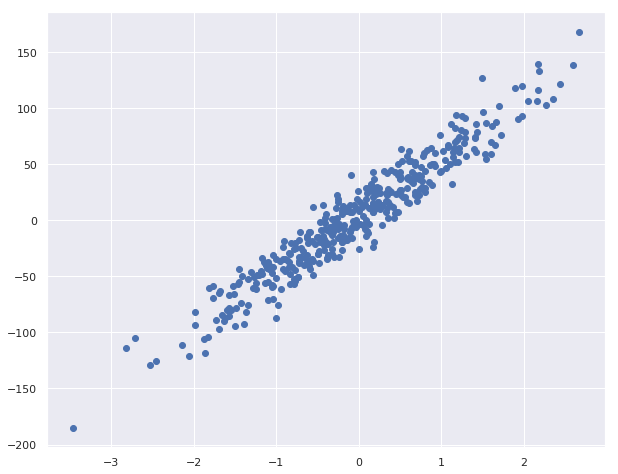

In [5]:
# Graficar estos datos para ver con qué se está trabajando
plt.figure(figsize=(10, 8))
plt.scatter(X, y)
plt.show()

 Como se esperaba el modelo es lineal pero algo importante de notar es la implementación de _scikit-learn_ donde se tuvo que especificar
 un parámetro de _ruido_ y un parámetro de _bias_. En particular esto se tiene que hacer dado que la implementación crearía un modelo lineal
 perfecto, y se busca que el modelo tenga al menos una cierta _dispersión_ en los datos.

In [6]:
# Separar el conjunto de datos en prueba y entrenamiento
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

 ## 1.2. Kernel _lineal_
 Esta implementación de la SVM corresponde al modelo lineal que se presentó en la sección de teoría. Para este caso, se espera que este kernel
 sea el mejor y que tenga una muy buena representación respecto a la correlación de los datos. Si llegara a tener _sobreajuste_ se puede deber
 a la mala optimización o ajuste de los hiperparámetros.

In [7]:
# Crear un regresor con kernel lineal
lineal = SVR(kernel='linear')
# Definir parámetros para la validación cruzada
params = {'C': sp_int(2**(-15), 2**15), 'epsilon': sp_int(2**(-8), 2**8)}
# Realizar la validación cruzada aleatoria
reg_lin = RandomizedSearchCV(lineal, param_distributions=params, scoring='neg_mean_squared_error',
n_iter=25, cv=10, iid=False, n_jobs=-1)
# Ajustar el modelo
reg_lin.fit(x_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid=False, n_iter=25, n_jobs=-1,
          param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f877e1eae48>, 'epsilon': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f877e1ea6a0>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

 ### Una nota sobre `RandomizedSearchCV`
 En esta parte del código se empleó la función [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
 para realizar validación cruzada del kernel lineal. Esto se realizó dado que el rango de búsqueda para los hiperparámetros es muy grande, y el método
 usual de Grid Search tardaría demasiado tiempo.
 En particular, _Randomized Search Cross Validation_ emplea el uso de distribuciones de probabilidad para realizar un muestreo del espacio de
 búsqueda y crear un conjunto óptimo de hiperparámetros. Es importante notar que esto es _aleatorio_ y que **no** se busca el espacio completo
 por lo que es posible que no siempre se obtengan los mismos resultados. Después en esta libreta se empleará otro método mucho más eficiente
 pero se deja esta por referencia de que también es una opción viable y rápida para obtener casi los mismos resultados que Grid Search.

In [8]:
# Mostrar los méjores parámetros
lineal = reg_lin.best_estimator_
print(lineal)

# Mostrar el R^2
print(lineal.score(x_train, y_train))

SVR(C=17667, cache_size=200, coef0=0.0, degree=3, epsilon=13,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)
0.9259129050970417


 Aunque aquí estamos mostrando el valor de correlación $R^2$ este valor **no** es una buena métrica para este tipo de modelos. Este
 valor numérico sólo corresponde a la _correlación_ entre los datos, pero en particular nos importa _minimizar_ el error entre
 la predicción y los valores reales del conjunto de datos. Por lo tanto, es muy común (y se emplea en esta libreta) el uso de otro
 tipo de métricas, en especial el [error cuadrático medio](https://en.wikipedia.org/wiki/Mean_squared_error), definido matemáticamente
 como:
 $$ MSE = \frac{1}{N} \sum_{i=1}^{N} (Y_i - \hat{Y}_i)^2 ,$$
 donde $Y$ son los datos reales y $\hat{Y}$ son los datos predichos por el modelo.

In [9]:
# Con este regresor, realizar predicciones
y_pred = lineal.predict(x_test)
# Mostrar solo algunos valores para visualización
y_pred[:5]

array([-45.65845965,  12.73268858,  46.43690945,   0.67378737,
        20.87592384])

In [10]:
# Calcular el error entre entrenamiento y prueba, se emplea la raíz cuadrada dado que MSE puede
# ser un número muy grande
print('RMSE para entrenamiento: {0}'.format(np.sqrt(np.abs(mean_squared_error(y_train, lineal.predict(x_train))))))
print('RMSE para prueba: {0}'.format(np.sqrt(np.abs(mean_squared_error(y_test, y_pred)))))

RMSE para entrenamiento: 14.14779650486298
RMSE para prueba: 15.095140215377297


 Dado que los errores son muy semejantes, **NO** existe sobreajuste del modelo. ¿A qué se debe esto? Es relativamente simple de ver.
 El error cuadrático medio es una medida de el desempeño del modelo para predecir los valores y la comparación con los datos
 originales, entonces, cuando el error es muy grande significa que el modelo **no predice** correctamente, no tiene la información
 suficiente de la _correlación_ entre los datos.

 En particular, cuando el modelo está _sobreajustado_ significa que ha tomado en cuenta muchas de las características de un subconjunto
 de los datos que **no** están presentes en todo el conjunto de datos por completo. De esta forma, el error será muy grande en un parte
 del proceso (e.g. la predicción del modelo) y será muy pequeño en la otra parte del proceso (e.g. el entrenamiento del modelo) debido
 a que no existe una **generalización** del modelo para otro subconjunto de datos dentro del mismo conjunto de datos total.

 Sin embargo, en este caso los errores medidos son relativamente _cercanos_ entre sí, lo que significa que el modelo puede **generalizar**
 efectivamente la _correlación_ de los datos, prediciendo correctamente los datos dentro de un margen de error.

 ## 1.2. Kernel _base radial._
 El kernel de _base radial_ se define como
 $$ K(\mathbf{x},\mathbf{x'}) = \exp{ \left( - \gamma \vert \vert \mathbf{x} - \mathbf{x'} \vert \vert^2 \right)}$$
 y es importante notar que cuando se tiene el límite $\gamma \to 0$ entonces se recupera el _modelo lineal_ dado que
 $$ \lim_{\gamma \to 0} \exp{ \left( - \gamma \vert \vert \mathbf{x} - \mathbf{x'} \vert \vert^2 \right)} = 1$$
 y usando la descripción presentada al principio de esta libreta, entonces el modelo se convierte a una función linea, recuperando entonces
 la regresión lineal con SVM.

 De esta forma se espera que el valor de $\gamma$ que se encuentre sea pequeño, cercano a 0. Sin embargo, aunque esto se logre, este _kernel_
 se espera que tenga un bajo desempeño dado que tiene que mapear los datos a un espacio diferente y ahí realizar la separación lineal. Esto
 _no_ está garantizado y por tanto se _espera_ que exista un alto número de vectores soporte que sean empleados para crear el modelo.

 ## Sección _bonus_. _Metaheurísticas._
 En esta sección se menciona rápidamente un método para realizar el ajuste de los hiperparámetros. En particular se desea minimizar el error
 de predicción y esto se puede traducir a la elección correcta de hiperparámetros que emplea el modelo tal que sean los mejores que efectivamente
 _minimizan_ algún tipo de métrica como el MSE.

 Las **metaheurísticas** son métodos de _optimización_ muy robustos que permiten la resolver problemas de optimización en muchas dimensiones, para
 funciones multimodales entre otras cosas.

 En particular, en esta libreta se emplean para el ajuste de hiperparámetros de las SVM, pero dado que no es el propósito de esta libreta realizar
 un estudio detallado y sistemático de estos algoritmos, sólo se menciona su mecánica general y en otra libreta se hará este estudio.

 Se envuelve al objeto SVR en un función para después hacer uso de una metaheurística
 y poder realizar ajuste adecuado de hiperparámetros.

In [11]:
def svr_fnc(x, x_tr=None, x_ts=None, y_tr=None, y_ts=None):
    # Crear una instancia del clasificador
    reg = SVR(kernel='rbf', gamma=x[0], C=x[1], epsilon=x[2])
    # Ajustarlo con los datos de entrenamiento
    reg.fit(x_tr, y_tr)
    y_pred = reg.predict(x_ts)
    # Siempre se buscan valores positivos del accuracy
    score = np.sqrt(np.abs(mean_squared_error(y_ts, y_pred)))

    return score

In [12]:
# Separar el conjunto de datos para validación cruzada usando
# separación de 10 pliegues
n_pliegues = 10
skf = KFold(n_splits=n_pliegues)

# Estos arreglos guardarán los resultados finales
# Este arreglo guarda los parámetros óptimos; gamma, C y epsilon
res_vals = np.zeros(3)
# Este arreglo guarda el valor de accuracy total
fnc_total = np.array([])

# Se comienza a iterar sobre los 10 pliegues de la validación cruzada
for tr, ts in skf.split(x_train, y_train):
    # Estos son los parámetros de entrada del Firefly Algorithm
    kwargs = {'func': svr_fnc, 'dim': 3, 'tam_pob': 20, 'alpha': 0.9, 'beta': 0.2, 'gamma': 1.0, 
    'inf': 2**(-4), 'sup': 2**4}
    # Se crea una instancia del Firefly Algorithm
    fa_solve = FAOpt(**kwargs, args=(X[tr], X[ts], y[tr], y[ts]))
    # Se llama al método que resuelve la optimización
    res, fnc = fa_solve.optimizar(15, optim=True)
    
    # Se guardan los resultados de cada iteración
    res_vals += res
    fnc_total = np.append(fnc_total, fnc)

# Los valores de los parámetros C y gamma deben estar normalizados, se divide por
# el número de pliegues
res_vals /= n_pliegues
# Por visualización, se muestran los resultados óptimos (opcional)
print(res_vals)

[ 0.35307398 14.73649032  6.78327699]


In [13]:
# Por último, usando los valores óptimos encontrados se realiza la clasificación final
reg_rbf = SVR(kernel='rbf', gamma=res_vals[0], C=res_vals[1], epsilon=res_vals[2])
reg_rbf.fit(x_train, y_train)
# Con este regresor, realizar predicciones
y_pred = reg_rbf.predict(x_test)
print(reg_rbf.score(x_test, y_test))

0.9016970517030295


In [14]:
# Calcular el error entre entrenamiento y prueba
print('RMSE para entrenamiento: {0}'.format(np.sqrt(np.abs(mean_squared_error(y_train, reg_rbf.predict(x_train))))))
print('RMSE para prueba: {0}'.format(np.sqrt(np.abs(mean_squared_error(y_test, y_pred)))))

RMSE para entrenamiento: 17.043409999344856
RMSE para prueba: 16.26012158518626


 Ahora bien, la variación de los errores encontrados _no_ es considerablemente grande, pero lo es. Esto puede significar que existe sobreajuste
 como se había conjeturado, pero no es una buena forma de comparación. Como se había comentado, otra forma útil de corroborar este hecho
 es encontrando el número de vectores soporte de cada modelo; entre mayor sea el modelo, es más complejo y por tanto puede existir un sobreajuste.

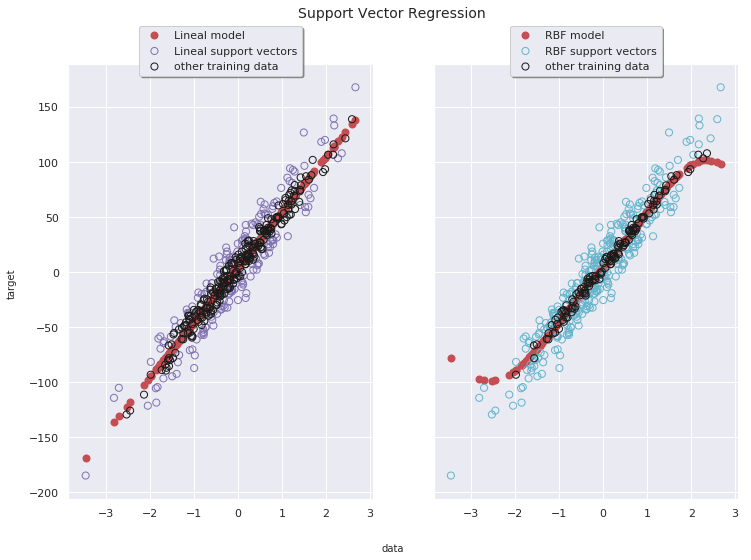

In [15]:
# Código tomado de
# https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py
# y adaptado para esta libreta.
lw = 2

svrs = [lineal, reg_rbf]
kernel_label = ['Lineal', 'RBF']
model_color = ['m', 'c']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8), sharey=True)
for ix, svr in enumerate(svrs):
    # axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
    #               label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X, svr.fit(X, y).predict(X), color='r', lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

 ## Conclusiones

 1. Como se puede ver, existe un número mayor de vectores soporte para el kernel _rbf_, que era de esperarse. La figura que crea la gráfica puede
 mejorarse si el valor de $\gamma$ es más pequeño, pero aquí lo importante es el número de vectores soporte. Claramente este caso es lineal
 y debe utilizarse un kernel _lineal_ para este problema.

 2. La parte importante de crear estos modelos de inteligencia computacional para _regresión_ es la **predicción**. ¿Qué tan bien predicen
 estos modelos? Por el _análisis_ de los errores encontrados y los coeficientes de correlación, claramente el kernel _lineal_ es el mejor
 pero se puede argumentar que dentro de un margen de error el kernel _rbf_ es aceptable.

 3. Por último, siempre es preferible un modelo que tenga una **menor complejidad**, i.e. el número de hiperparámetros es pequeño. Esto porque
 facilita la búsqueda de estos valores, es más eficiente y se puede evitar en gran medida el problema de _sobreajuste._ En dado caso que
 el problema lo requiera y se necesite un kernel de tipo _rbf_ se puede emplear una _metaheurística_ para acelerar considerablemente la búsqueda
 de los hiperparámetros.

 ## 2. Aplicación: aceleración de la gravedad (_revisited_)
 En muchas ramas de la ciencia, pero específicamente en Física, determinar el valor de la **aceleración de la gravedad** es un ejercicio
 clásico que se realiza para conocer sobre el diseño de experimentos y la _excepcional_ precisión de las leyes de Newton.

 ### Problema a resolver.
 De las leyes de Newton se sabe que la relación entre la aceleración y la posición de una partícula puntual sigue la forma:
 $$ \frac{d^2 \mathbb{x}}{dt^2} = m \mathbb{a}$$
 donde $\mathbb{x}$ es la posición de la partícula, $\mathbb{a}$ su aceleración, $m$ su masa y $t$ es el tiempo.

 Cuando una partícula puntual está sujeta a la influencia de un campo gravitacional, entonces se puede redefinir la ecuación anterior
 de la siguiente forma:
 $$ m \frac{d^2 x}{dt^2} = m g$$
 donde ahora $g$ es la **constante de aceleración de la gravedad**, donde ahora la posición es un número real, en lugar de un vector,
 porque la caída libre se experimenta en una sola dimensión espacial.

 Utilizando los conceptos básicos de la _teoría de las ecuaciones diferenciales_ se encuentra la siguiente expresión:
 $$ \frac{d \mathbb{x}}{dt} = g t + v_o$$
 donde $v_o$ es la velocidad inicial de la partícula, y entonces se ha encontrado un modelo lineal general para este fenómeno, i.e.
 $$ v(t) = g t + v_o $$
 y este modelo se puede utilizar para encontrar $g$ si se realizan mediciones de $t$ y $v.$

 ### Sobre el diseño de experimentos.
 Como se menciona anteriormente, se puede determinar fácilmente esta constante universal con este experimento. Pero este tipo de ajustes
 se realizan cuando existe un fenómeno que se pretende estudiar y es cuando se **diseña** un experimento alrededor de éste. Esto implica varias
 cosas: ya se sabe la relación entre las variables, ya se conocen las escalas, y sobre todo, se pueden controlar datos _atípicos_ (en el mejor
 de los casos). En este tipo de situaciones, sólo basta encontrar los parámetros y una regresión lineal ordinaria lo puede realizar.
 ¿Qué puede ofrecer la _inteligencia computacional_ en este aspecto?

 ### Inteligencia Computacional para experimentos
 Aunque los métodos de inteligencia computacional son empleados cuando _no_ se conoce una relación entre las variables, en este tipo de casos
 aún es muy válido emplear los métodos para diversas situaciones: eliminación de ruido, procesamiento de datos, elección de las características
 más importantes, entre muchas otras cosas. En esta sección se presenta el uso de máquinas de soporte vectorial para este tipo de experimentos
 y poder determinar los coeficientes necesarios.

 ### Hipótesis y datos del experimento
 En este experimento se presentan mediciones de _velocidades_ y _tiempos_ de una pelota al caer un altura de un metro. El **objetivo** es encontrar
 un modelo lineal tal que los parámetros de la _función de decisión_ obtenida sean los valores reales o aproximados. El movimiento de la pelota
 fue grabada con una cámara de video y luego procesado mediante software especializado; es posible que exista ruido en estas mediciones.

 En particular, se espera que el valor de la ordenada al origen sea cero, dado que corresponde a $v_o$ que es la velocidad inicial y la pelota
 parte del reposo.

 Se pretende encontrar un valor cercano al valor real de $g = 9.81 m/s$ con signo negativo.

In [16]:
# Importar los datos con pandas
gravedad_datos = os.path.abspath('datasets/gravedad.csv')
data = pd.read_csv(gravedad_datos)

In [17]:
# Se pueden ver los datos
data

,cuadro,t,x,y,Unnamed: 4,a_{y},v_{y}
0,1,0.000,0,0.069,0.0069,--,--
1,2,0.042,0,0.059,0.0059,--,-0.28
2,3,0.083,0,0.046,0.0046,-6.108,-0.408
3,4,0.125,0,0.025,0.0025,-9.835,-0.778
4,5,0.167,0,-0.019,-0.0019,-12.345,-1.258
5,6,0.209,0,-0.080,-0.0080,-11.362,-1.787
6,7,0.250,0,-0.168,-0.0168,-9.99,-2.244
7,8,0.292,0,-0.268,-0.0268,-9.395,-2.588
8,9,0.334,0,-0.384,-0.0384,-10.818,-3.03
9,10,0.375,0,-0.520,-0.0520,-10.042,-3.498


In [18]:
# Como faltan datos, se quitan la primera y última filas
data = data.drop([0, 12])

In [19]:
# Revisar de nuevo los datos para asegurarse que todo está bien
data

,cuadro,t,x,y,Unnamed: 4,a_{y},v_{y}
1,2,0.042,0,0.059,0.0059,--,-0.28
2,3,0.083,0,0.046,0.0046,-6.108,-0.408
3,4,0.125,0,0.025,0.0025,-9.835,-0.778
4,5,0.167,0,-0.019,-0.0019,-12.345,-1.258
5,6,0.209,0,-0.080,-0.0080,-11.362,-1.787
6,7,0.250,0,-0.168,-0.0168,-9.99,-2.244
7,8,0.292,0,-0.268,-0.0268,-9.395,-2.588
8,9,0.334,0,-0.384,-0.0384,-10.818,-3.03
9,10,0.375,0,-0.520,-0.0520,-10.042,-3.498
10,11,0.417,0,-0.676,-0.0676,-6.045,-3.876


In [20]:
# Dado que sólo importan las columnas de t y v, se extraen de los datos
X = np.asarray(data['t'].values).reshape(-1, 1)
y = np.asarray(data['v_{y}'].values).astype(np.float)
print(X)
print(y)

[[0.042]
 [0.083]
 [0.125]
 [0.167]
 [0.209]
 [0.25 ]
 [0.292]
 [0.334]
 [0.375]
 [0.417]
 [0.459]]
[-0.28  -0.408 -0.778 -1.258 -1.787 -2.244 -2.588 -3.03  -3.498 -3.876
 -4.015]


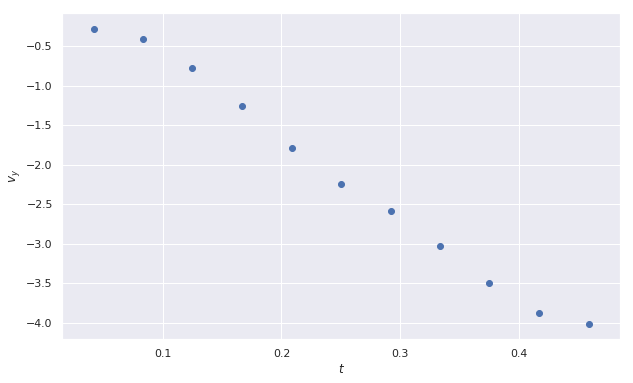

In [21]:
# Graficar los datos para visualizar el dataset
plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.xlabel(r'$t$')
plt.ylabel(r'$v_{y}$')
plt.show()

 ## 2.1. _Primer_ intento, acercamiento _ingenuo_ a los datos.
 En esta primera etapa se realiza una gráfica de los datos con la regresión lineal ordinaria, así como la estimación
 de los parámetros del modelo lineal. Sin embargo, como se ha visto el número de datos es muy reducido, y tomando
 en cuenta que es posible que exista una posible fuente de error en los datos. ¿Se puede confiar en este tipo
 de análisis?

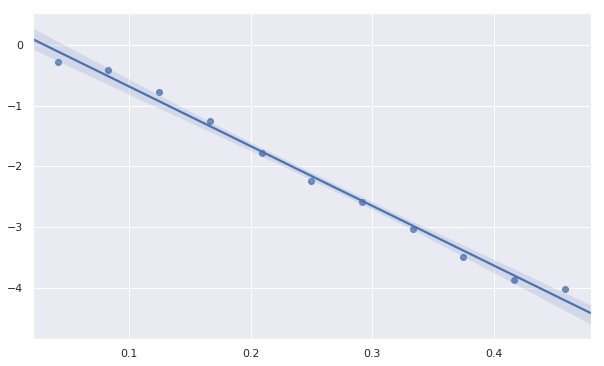

In [22]:
# Visualizar el intervalo de confianza de una regresión lineal
plt.figure(figsize=(10,6))
sns.regplot(X, y)

In [23]:
from scipy.stats import linregress
slope, intercept, rvalue, __, __ = linregress(data['t'].values, y)
print(f'Slope: {slope}, Const: {intercept}, R^2: {rvalue}')

Slope: -9.819628082683765, Const: 0.2974032828753095, R^2: -0.9962945950791025


In [24]:
import statsmodels.api as sm
x_sts = sm.add_constant(X)
mod = sm.OLS(y, x_sts)
res = mod.fit()
print(res.summary(alpha=0.1))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     1208.
Date:                Sun, 31 Mar 2019   Prob (F-statistic):           6.68e-11
Time:                        21:35:43   Log-Likelihood:                 8.4925
No. Observations:                  11   AIC:                            -12.98
Df Residuals:                       9   BIC:                            -12.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|       [0.05       0.95]
------------------------------------------------------------------------------
const          0.2974      0.080      3.720      0.0

/home/edwin/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


 Ahora se puede visualizar con más claridad el intervalo de confianza de los parámetros, y los parámetros mismos. Por la forma
 de la figura se espera que estos valores sean confiables dentro del margen de error, pero es muy pequeño. ¿Cómo se puede asegurar
 que este intervalo de confianza no se ve afectado por datos atípicos o mediciones erróneas? La incertidumbre de las mediciones
 puede jugar un papel importante en este intervalo de confianza.

 Por lo tanto, para estar asegurarse completamente de estos valores, se propone la siguiente metodología:

 1. Empleando SVM de kernel _lineal_ realizar la estimación de los datos.
 2. Para asegurarse del intervalo de confianza, se propone realizar _remuestreo_ mediante **dos** técnicas:

 a. **boostrap**, y

 b. **validación cruzada repetida de 5 pliegues**.


In [25]:
# Antes que nada, estandarizar los datos
scaler = MaxAbsScaler()
# Cambiar la forma del arreglo original para mantener consistencia
X = scaler.fit_transform(X)
print(X.shape)

(11, 1)


 Recordar que para emplear SVR los datos deben de estar _estandarizados_, i.e. que tengan _media_ cero y desviación _estándar_.
 Si esto suena familiar es porque se asemeja a una de las hipótesis fundamentales de la regresión lineal ordinaria, pero ahora
 es para los datos y no para los errores.

 Este argumento se realiza porque la función que se acaba de emplear, `MaxAbsScaler`, _no_ estandariza los datos como tal, sino
 que los escala hacia el valor más grande del conjunto de datos. Pero esto es suficiente para la SVM, y además esto permite que
 la recuperación de los parámetros que se buscan sea más fácil.

 Como **nota** importante debe mencionarse que la función ideal para la transformación de datos dentro de _scikit-learn_ puede
 ser `StandardScaler` cuando se pretenda trabajar con SVM.

In [26]:
# Debe de ser el mismo número que antes para mantener la consistencia de los datos
print(y.shape)

(11,)


 ## 2.2. _Bootstrap_ y el intervalo de confianza de remuestreos
 **NOTA:** Para más información visitar la referencia 7 y los libros estándar de texto de estadística.

 El método de **bootstrap** es un método de muestreo muy simple: dado un conjunto de datos, se escoge un número que será el número total
 de datos que se tomarán del conjunto de datos original, i.e. el **número de la muestra**. Luego, estos datos se devuelven al conjunto original
 y se vuelven a tomar datos del conjunto de datos original, con _reemplazo_, y así consecutivamente, tantas veces como se desee.
 Es un método simple, y ahora se explicará para qué sirve y porqué se utiliza en esta libreta.

 Para el caso del _bootstrap_ se puede aplicar de la siguiente forma: se pretende saber si los errores siguen una distribución normal para
 satisfacer las hipótesis de la regresión lineal ordinaria.

 Adicionalmente, se puede construir un intervalo de confianza para los **parámetros** del modelo de regresión lineal, tal que cuando se estimen
 se pueda asegurar que dentro de un margen probabilístico, los valores son certeros.
 Este intervalo de confianza se construirá a partir de [percentiles](https://en.wikipedia.org/wiki/Percentile) utilizando el $95^o$ percentil
 de los datos obtenidos con el remuestreo.

 Sobre el uso del _remuestreo_ es importante mencionar que se debe utilizar debido al número reducido de datos en el conjunto total de datos.
 Dado que es un número pequeño, el hecho de construir un intervalo de confianza con todas las muestras nuevas permite que la determinación
 de los parámetros sea mucho más creíble y robusto.

 El acercamiento que se pretende en esta subsección se puede desglosar de la siguiente forma:

 1. Crear tantas muestras como se pueda utilizando la técnica de **bootstrap.**
 2. Construir un intervalo de confianza alrededor de la _media_ de los errores para asegurar que los parámetros obtenidos


In [27]:
# Primero, separar el conjunto de datos para crear el mejor modelo a utilizarse.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)
grv = SVR(kernel='linear')
params = {'C': np.logspace(-5, 5), 'epsilon': np.logspace(-4, 4)}
grv_cv = GridSearchCV(grv, param_grid=params, scoring='neg_mean_squared_error', cv=5,
iid=False, n_jobs=-1)
grv_cv.fit(x_train, y_train)
# Se guarda este estimador para lo que resta de esta sección.
grv = grv_cv.best_estimator_

 **ADVERTENCIA:** Este número de repeticiones puede tardar mucho en ejecución, para resultados
 ilustrativos reducir el número a 1000 o 10000.

In [28]:
# Este es el número de repeticiones de bootstrap
n_iter = int(1e7)
n_size = int(len(X) * 0.50)
# Se muestra el número de muestra que se tomará por cada iteración de bootstrap
n_size

5

In [29]:
# Crear arreglos para guardar los valores importantes
res_err = np.array([]) # Errores
bts_slope = np.array([]) # Pendiente
b_inter = np.array([]) # Ordenada
for __ in range(n_iter):
    # Preparar los datos de prueba y entrenamiento
    # empleando la técnica de bootstrap, remuestreo con reemplazo
    x_train, y_train = resample(X, y, n_samples=n_size)
    x_test = np.array([x for x in X if x.tolist() not in x_train.tolist()])
    y_test = np.array([x for x in y if x.tolist() not in y_train.tolist()])
    
    # Ajustar el modelo con el conjunto de entrenamiento de cada muestra
    # de bootstrap
    grv.fit(x_train, y_train)
    # Calcular los errores y guardarlos
    err = mean_squared_error(y_test, grv.predict(x_test))
    res_err = np.append(res_err, err)
    bts_slope = np.append(bts_slope, grv.coef_)
    b_inter = np.append(b_inter, grv.intercept_)

 Ahora se genera un **intervalo de confianza** para el parámetro de la _pendiente de la recta_ habiendo realizado
 10 millones de muestras de _bootstrap_. Este intervalo de confianza se crea utilizando percentiles, para un intervalo
 de confianza del 95%.

In [30]:
# Se muestran los resultados obtenidos del bootstrap
print('Pendiente promedio: {0:.4f}\nDesviación estándar: {1:.4f}'.format(bts_slope.mean(), bts_slope.std()))
print()
print('Ordenada: {0:.4f}\nDesviación estándar: {1:.4f}'.format(b_inter.mean(), b_inter.std()))
# Aquí se calcula el intervalo de confianza
left = np.percentile(bts_slope, 2.5)
right = np.percentile(bts_slope, 97.5)
# Mostrar los resultados obtenidos
print('Intervalo de confianza del 95%')
print(left, right)

Pendiente promedio: -4.2949
Desviación estándar: 0.3782

Ordenada: 0.1818
Desviación estándar: 0.2532
Intervalo de confianza del 95%


(-4.675002495149036, -3.5891340414371684)

 Como se había mencionado en la teoría, se busca que los errores sigan una distribución normal. Esto es de mucha ayuda dado que
 da una certeza mayor de que la regresión _es_ lineal, i.e. la relación entre los datos es verdaderamente lineal y los
 parámetros encontrados tienen significancia estadística.


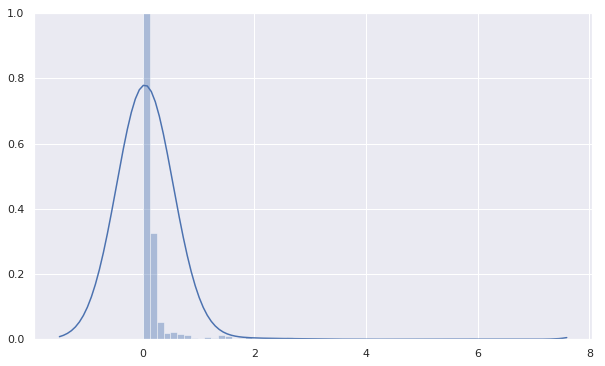

In [31]:
# Usando una función especial de seaborn que muestra también la densidad de probabilidad
# de la distribución, mostrar la figura de los errores
plt.figure(figsize=(10,6))
sns.distplot(res_err, kde_kws={'bw': 0.5})
plt.ylim((0, 1))
plt.show()

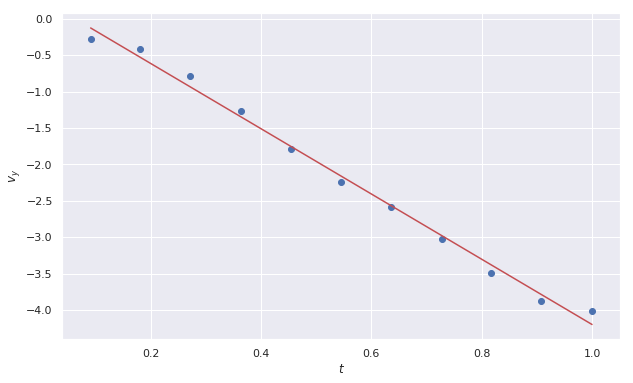

In [32]:
# Graficar los resultados obtenidos, se debería encontrar una gráfica ajustada
plt.figure(figsize=(10,6))
plt.scatter(X, y)
plt.plot(X, grv.fit(X, y).predict(X), c='r')
plt.xlabel(r'$t$')
plt.ylabel(r'$v_{y}$')
plt.show()

 Mostrar el error RMSE y el valor de $R^2.$

In [33]:
y_pred = grv.predict(X)
print(np.sqrt(np.abs(mean_squared_error(y, y_pred))))
print(grv.fit(X, y).score(X, y))

0.11195303985260414
0.9925835884405901


 Mostrar los parámetros encontrados.

In [34]:
slope = bts_slope.mean() / max(data['t'].values)
slope_std = bts_slope.std() / max(data['t'].values)
inter = b_inter.mean() / max(data['t'].values)
inter_std = b_inter.std() / max(data['t'].values)

In [35]:
print(slope, slope_std)
print(inter, inter_std)

-9.357005624838722 0.8240262541511517
0.396124649946533 0.5516321687131023


 Para la técnica de **bootstrap** se encontró el modelo siguiente:
 $$ $$
 y dado al intervalo de confianza realizado anteriormente, cada vez que se realice
 un ajuste lineal para este conjunto de datos, se podrá asegurar que el 95% de las veces
 se encontrará un par de coeficientes semejantes. Sin embargo, es importante mencionar el error encontrado
 para el promedio de la pendiente dentro del remuestreo por _bootstrap_, y es que este error es considerablemente
 grande. Esto puede implicar que este método posee un cierto _sesgo_ o _varianza_ repecto a los datos y es
 importante revisar una técnica adicional de muestreo para descartar este hecho.


 ### 2.3. Validación de $k$-pliegues cruzada como técnica de muestreo
 Según la referencia 9, la validación cruzada de $k$-pliegues, repetida un número $n$ de veces sirve como técnica de muestreo que
 tiene la ventaja de tener un **bajo sesgo** y es un método eficiente, rápido y provee de un bajo error en la estimación de las
 estadísticas buscadas.

 Por tanto, se pretende encontrar que los promedios encontrados para estos valores sean buenos y los errores sean bajos.

 **ADVERTENCIA:** Es posible que este número de repeticiones tome mucho tiempo de cómputo, usar
 bajo discreción en el momento que se desee volver a ejecutar esta libreta.

In [37]:
# Implementar repeated k-fold
res_err = np.array([])
bts_slope = np.array([])
b_inter = np.array([])
rkf = RepeatedKFold(n_splits=5, n_repeats=100000)
for tr, ts in rkf.split(X, y):
    grv.fit(X[tr], y[tr])
    err = mean_squared_error(y[ts], grv.predict(X[ts]))
    res_err = np.append(res_err, err)
    bts_slope = np.append(bts_slope, grv.coef_)
    b_inter = np.append(b_inter, grv.intercept_)

In [38]:
print('Pendiente promedio: {0:.4f}\nDesviación estándar: {1:.4f}'.format(bts_slope.mean(), bts_slope.std()))
print()
print('Ordenada: {0:.4f}\nDesviación estándar: {1:.4f}'.format(b_inter.mean(), b_inter.std()))
left = np.percentile(bts_slope, 2.5)
right = np.percentile(bts_slope, 97.5)
# Mostrar el intervalo de confianza encontrado
print('Intervalo de confianza del 95%')
print(left, right)

Pendiente promedio: -4.4392
Desviación estándar: 0.1007

Ordenada: 0.2667
Desviación estándar: 0.0570
Intervalo de confianza del 95%


(-4.5967556914741525, -4.3023844754622615)

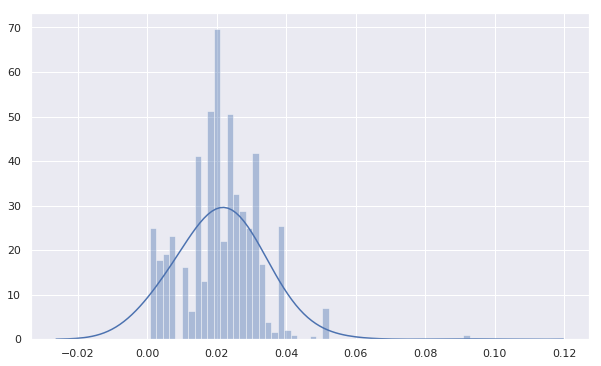

In [68]:
# Esta es la gráfica de errores encontrada
plt.figure(figsize=(10,6))
sns.distplot(res_err, kde_kws={'bw': 0.009})
plt.show()

[0.32379188]
[[-4.52719375]]


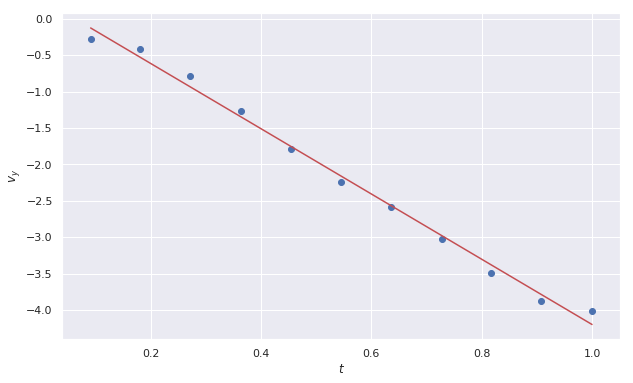

In [40]:
# Graficar los resultados obtenidos
print(grv.intercept_)
print(grv.coef_)
plt.figure(figsize=(10,6))
plt.scatter(X, y)
plt.plot(X, grv.fit(X, y).predict(X), c='r')
plt.xlabel(r'$t$')
plt.ylabel(r'$v_{y}$')
plt.show()

 Mostrar el error RMSE y el valor de $R^2.$

In [41]:
y_pred = grv.predict(X)
print(np.sqrt(np.abs(mean_squared_error(y, y_pred))))
print(grv.fit(X, y).score(X, y))

0.11195303985260414
0.9925835884405901


 Mostrar los parámetros encontrados.

In [42]:
slope = bts_slope.mean()/max(data['t'].values)
slope_std = bts_slope.std()/max(data['t'].values)
inter = b_inter.mean()/max(data['t'].values)
inter_std = b_inter.std()/max(data['t'].values)

In [43]:
print(slope, slope_std)
print(inter, inter_std)

-9.671500932492021 0.21933699931482362
0.5810918097640485 0.12420090743498881


 Como se puede observar, el resultado es semejante, la distribución de los errores sigue una distribución
 normal como era esperado, pero algo más interesante es el error encontrado en los valore de remuestreo, pues
 este valor es considerablemente menor que mediante la técnica de _bootstrap._
 Esto confirma el hecho de que, para cierto tipo de conjunto de datos, la técnica de _bootstrap_ no es tan
 efectiva y que se debe preferir la validación cruzada de $k$-pliegues, repetida $n$ veces como alternativa.
 Para más información visitar la referencia 9.

 Para concluir esta sección, se encontró que para la técnica de validación cruzada reptida $n$ veces de
 $k$-pliegues el modelo es:
 $$ $$
 y dado al intervalo de confianza realizado anteriormente, cada vez que se realice
 un ajuste lineal para este conjunto de datos, se podrá asegurar que el 95% de las veces
 se encontrará un par de coeficientes semejantes.

 ## 3. Métodos de _ensamble._
 Los **métodos de ensamble** representan un pilar fundamental en el área de la inteligencia computacional
 y el aprendizaje estadísticos. Este tipo de métodos permiten utilizar métodos o algoritmos más simple que
 tengan ciertas desventajas por sí solos, por ejemplo, estimador que tengan una _alta varianza_ o un
 _sesgo_ muy pronunciado.
 Al realizar un **ensamble** de todos estos estimadores, y mediante técnicas de muestreo, se puede construir
 un **súper estimador** que contenga _muy_ pocos de los errores que tenían los estimadores originales, y
 una alta tasa de predicción o clasificación según sea el caso.

 En particular, en esta librerta se emplearán las SVM sólo porque se pretende comparar el desempeño
 de este tipo de métodos y sus técnicas de muestreo. _No_ significa que la SVM requieran de este tipo de
 métodos para funcionar, dado que se ha comprobado anteriormente en esta libreta que ese _no_ es el caso.


 ### 3.1. _Bagging estimators_
 **NOTA:** Se pretende dar solamente un resumen ilustrativo del método, para mayor información visitar
 la referencia 10.

 El propósito de los _bagging predictors_ (Breiman, 1996) es utilizar métodos más simples que no tengan un buen
 desempeño de regresión realizar un promedio mediante técnicas de muestreo tal que el resultado es un mejor estimador
 siendo el promedio general de todos los estimadores anteriores.

 Dentro de las ventajas de realizar este tipo de métodos está el hecho de que es eficiente, rápido y que provee
 de un estimado de la regresión muy bueno.
 Sin embargo, este tipo de modelos prefieren datos _no lineales_ para ser muy efectivos en escenarios cuando son
 datos relacionados linealmente, el estimador puede sobreajustarse.

 En esta libreta se utiliza un _bagging predictor_ empleando SVM para comparar el resultado del remuestreo
 mediante _bootstrap_ con la técnica implementada a mano en la sección anterior.

In [48]:
# Crear el regresor con la SVM anterior (el mejor modelo encontrado)
n_svr = 1000000
bag_reg = BaggingRegressor(grv, n_estimators=n_svr, n_jobs=-1)
bag_reg.fit(x_train, y_train)
y_pred = bag_reg.predict(x_test)
print('RMSE: ')
print(np.sqrt(np.abs(mean_squared_error(y_test, y_pred))))

RMSE: 
0.15158453935111552
[[-4.55976211]]


In [58]:
slope = np.array([i.coef_ for i in bag_reg.estimators_])/max(data['t'].values)
inter = np.array([i.intercept_ for i in bag_reg.estimators_])/max(data['t'].values)

In [59]:
print(slope.mean(), slope.std())
print(inter.mean(), inter.std())

-9.324163003391645 1.4115763460896253
0.2730261980969251 0.9621688866072179


 El modelo final es el siguiente:
 $$  $$
 y dado al intervalo de confianza realizado anteriormente, cada vez que se realice
 un ajuste lineal para este conjunto de datos, se podrá asegurar que el 95% de las veces
 se encontrará un para de coeficientes semejantes.

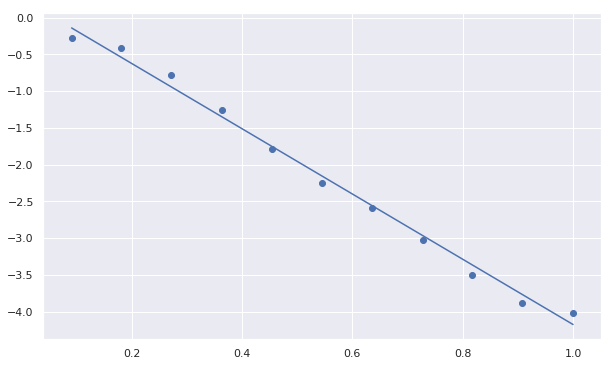

In [46]:
# Mostrar la regresión obtenida
plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.plot(X, bag_reg.fit(X,y).predict(X))
plt.show()

 ## Conclusiones

 1. El número de datos en este ejercicio fue la mayor limitante, en cierta forma. Aunque las SVM tienen un excelente desempeño,
 trabajar con pocos datos presenta un problema técnico más elaborado que solamente cuando
 se maneja la estadística de forma precisa es útil manejar este tipo de conjunto de datos; sin embargo
 este tipo de situaciones se pueden presentar en muchos escenarios donde los _experimentos son diseñados_ desde antes.

 2. Se observó que la técnica de muestreo _bootstrap_ es buena, pero no es la mejor para este conjunto de datos. Cuando se pretenda
 emplear esta técnica, es mejor utilizar un método más robusto como los _bagging estimators._

 3. La validación cruzada de $k$-pliegues puede ser de mucha ayuda cuando se pretende crear intervalos de confianza que
 tengan por objetivo ser intervalos robustos para parámetros particulares. En conjunto con las SVM tienen un excelente desempeño
 en conjuntos de datos pequeños.

 ## Referencias

 1. [_Linear Regression in Machine Learning_](https://www.ismll.uni-hildesheim.de/lehre/ml-07w/skript/ml-2up-01-linearregression.pdf)
 2. [_Regression and Stats Primer_](http://polisci2.ucsd.edu/dhughes/teaching/OLS_Slides_Handout.pdf)
 3. [_Support Vector Machines. Optimization Based Theory, Algorithms, and Extensions_](https://doc.lagout.org/science/0_Computer%20Science/2_Algorithms/Support%20Vector%20Machines_%20Optimization%20Based%20Theory%2c%20Algorithms%2c%20and%20Extensions%20%5bDeng%2c%20Tian%20%26%20Zhang%202012-12-17%5d.pdf)
 Deng, N. _et al._
 4. [_A Tutorial on Support Vector Regression._](https://alex.smola.org/papers/2003/SmoSch03b.pdf)
 Smola, A., & Schölkopf, B.
 5. [_A Tutorial on Support Vector Machines for Pattern Recognition._](http://people.csail.mit.edu/dsontag/courses/ml12/notes/burges_SVM_tutorial.pdf)
 Burges, C.
 6. [_Support Vector Regression_](https://static.aminer.org/pdf/PDF/000/337/560/uncertainty_support_vector_method_for_ordinal_regression.pdf)
 Basak, D. _et al._
 7. [Asymptotic Behaviors of Support Vector Machines with Gaussian Kernel](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.141.880&rep=rep1&type=pdf)
 8. [Bootstrap confidence intervals](https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/readings/MIT18_05S14_Reading24.pdf)
 9. _Applied Predictive Modeling_. Kuhn, M., & Johnson, K. _Springer,_ 2013.
 10. [_Bagging Estimators_.](https://www.stat.berkeley.edu/~breiman/bagging.pdf) Breiman, Leo.